In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
#How many books do not have an original title [books.csv]?
books_Notitle = books[books['original_title'].isnull()]
num_books_No_title = len(books_Notitle)
print(f"Number of books that do not have an original title: {num_books_No_title}")

Number of books that do not have an original title: 36


In [5]:
#How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]
books_without_null = books.dropna(subset=['original_title'])
unique_books = books_without_null['book_id'].nunique()
print(f"Number of unique books: {unique_books}")

Number of unique books: 363


In [6]:
#How many unique users are present in the dataset [ratings.csv] ?
unique_users = ratings['user_id'].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique users: 40836


In [7]:
#How many unique tags are there in the dataset [book_tags.csv] ?
unique_tags = book_tags['tag_id'].nunique()
print(f"Number of unique tags: {unique_tags}")

Number of unique tags: 3651


In [8]:
#Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.
most_used_tag = book_tags['tag_id'].value_counts().idxmax()
print(f"The most frequently used tag: {most_used_tag}")

The most frequently used tag: 4600


In [10]:
#Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .
merged = pd.merge(book_tags, books, on='goodreads_book_id', how='inner')
tag_counts = merged.groupby('title')['count'].sum()

most_tagged = tag_counts.idxmax()

print(f"The book with the most tag counts is '{most_tagged}' with {max_tag} tag counts.")

The book with the most tag counts is 'Bossypants' with 387679 tag counts.


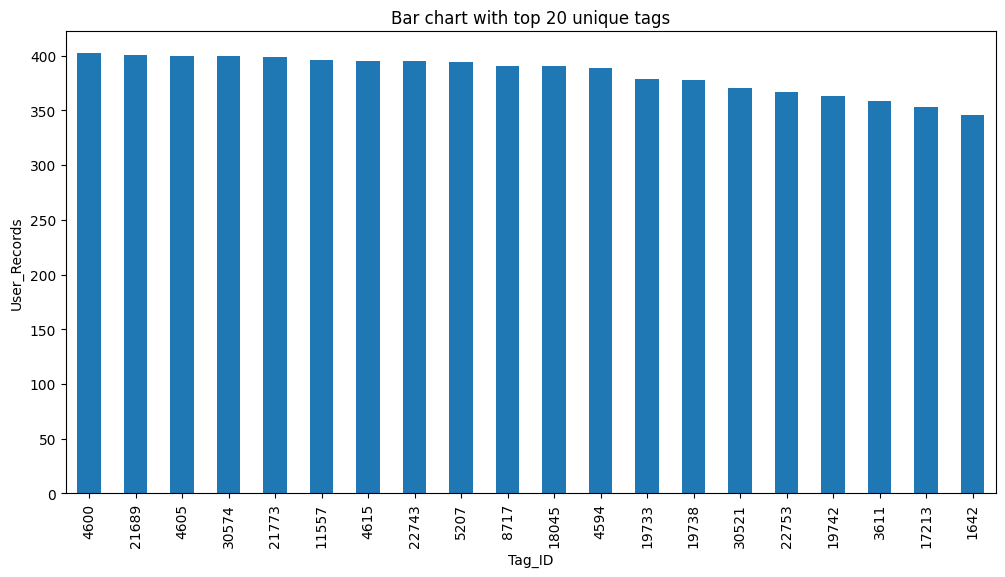

In [9]:
#Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]
top_tags = book_tags.groupby('tag_id').size().nlargest(20)
top_tags.plot(kind='bar', figsize=(12, 6), title='Bar chart with top 20 unique tags')
plt.xlabel('Tag_ID')
plt.ylabel('User_Records')
plt.show()